### Importing packages and reading data form CSV file

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

data_dir='E:/pro_cs244/crime_data.csv'

df0 = pd.read_csv(data_dir)
df0.head(5)
print(len(df0))

794446


In [3]:
df=df0.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782926 entries, 0 to 794445
Data columns (total 22 columns):
ID                      782926 non-null int64
Case Number             782926 non-null object
Date                    782926 non-null object
Block                   782926 non-null object
IUCR                    782926 non-null object
Primary Type            782926 non-null object
Description             782926 non-null object
Location Description    782926 non-null object
Arrest                  782926 non-null bool
Domestic                782926 non-null bool
Beat                    782926 non-null int64
District                782926 non-null float64
Ward                    782926 non-null float64
Community Area          782926 non-null float64
FBI Code                782926 non-null object
X Coordinate            782926 non-null float64
Y Coordinate            782926 non-null float64
Year                    782926 non-null int64
Updated On              782926 non-null objec

In [5]:
# Extracting time_window from Date column
def make_window(row):
    date, time, half = row.split()
    h = int(time[0:2])
    if(half == 'AM'):
        if(h <= 6):
            return 'night'
        else:
            return 'morning'
    if(half == 'PM'):
        if(h <= 6):
            return 'afternoon'
        else:
            return 'evening'
        

In [6]:
df['time_window'] = df.apply(lambda row: make_window(row['Date']), axis=1)

In [7]:
df['time_window']

0           evening
3           morning
8           morning
10        afternoon
19        afternoon
            ...    
794441    afternoon
794442        night
794443        night
794444      evening
794445      evening
Name: time_window, Length: 782926, dtype: object

In [8]:
print(df.groupby('Primary Type').size())

Primary Type
ARSON                                  1189
ASSAULT                               60168
BATTERY                              148273
BURGLARY                              34236
CONCEALED CARRY LICENSE VIOLATION       434
CRIM SEXUAL ASSAULT                    4680
CRIMINAL DAMAGE                       83227
CRIMINAL TRESPASS                     20482
DECEPTIVE PRACTICE                    50887
GAMBLING                                534
HOMICIDE                               1776
HUMAN TRAFFICKING                        31
INTERFERENCE WITH PUBLIC OFFICER       3933
INTIMIDATION                            480
KIDNAPPING                              535
LIQUOR LAW VIOLATION                    686
MOTOR VEHICLE THEFT                   30247
NARCOTICS                             38293
NON-CRIMINAL                             75
NON-CRIMINAL (SUBJECT SPECIFIED)          5
OBSCENITY                               220
OFFENSE INVOLVING CHILDREN             6571
OTHER NARCOTIC VIOL

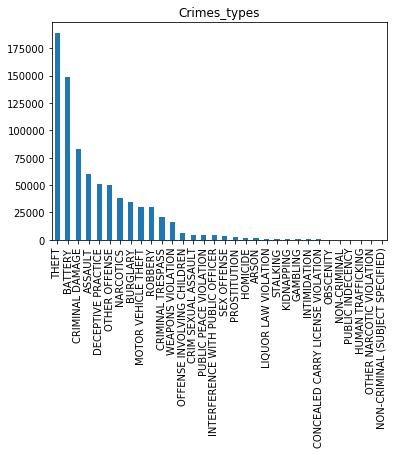

In [9]:
df['Primary Type'].value_counts().plot.bar()
plt.title("Crimes_types")
plt.show()

### time window for each type of crime

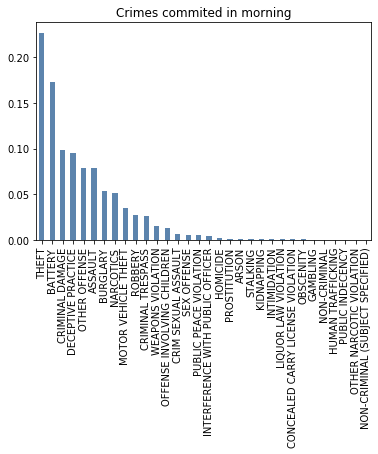

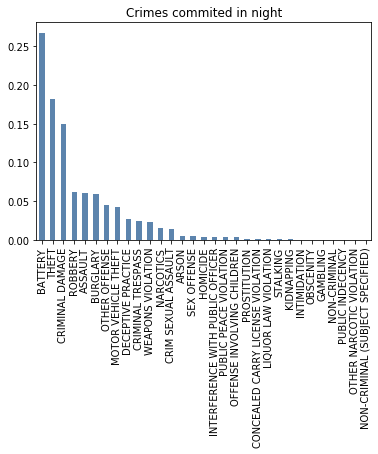

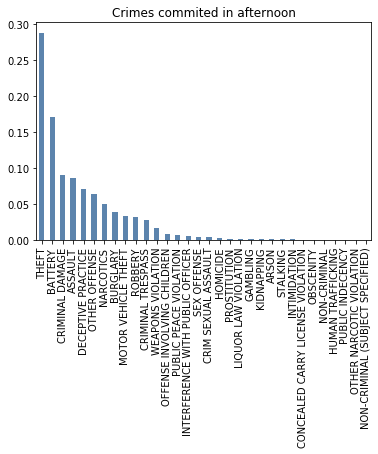

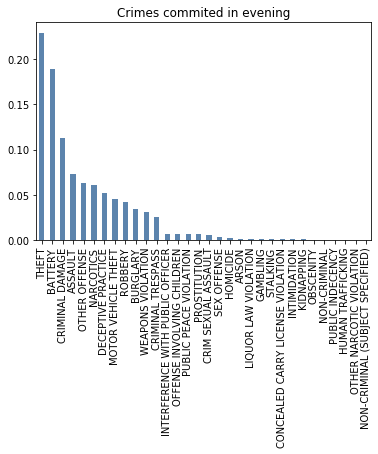

In [10]:
color = (0.2, 0.4, 0.6, 0.8)

df[df.time_window == 'morning']['Primary Type'].value_counts(normalize=True).plot.bar(color=color)
plt.title("Crimes commited in morning")
plt.show()

df[df.time_window == 'night']['Primary Type'].value_counts(normalize=True).plot.bar(color=color)
plt.title("Crimes commited in night")
plt.show()

df[df.time_window == 'afternoon']['Primary Type'].value_counts(normalize=True).plot.bar(color=color)
plt.title("Crimes commited in afternoon")
plt.show()

df[df.time_window == 'evening']['Primary Type'].value_counts(normalize=True).plot.bar(color=color)
plt.title("Crimes commited in evening")
plt.show()